<a href="https://colab.research.google.com/github/alonpena/brain-tumor-detector/blob/main/BTD_CNN_RUN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Brain Tumor Detector with CNN

Verify the tensorflow version, by default it comes with the latest stable version of the package. It is necessary to install the 2.14.0 version. Execute the following two blocks of code below and refresh the environment. Check version again and i should be set to 2.14.0.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


Since we are in an online environment and we are using the TensorFlow framework, specific packages on the library stopped having support, so we are using a former version specifically 2.14.0.
Some errors may come up because a conflict in libraries, it is not a problem since we are not using them. Follow the steps above.

Cuda allows us to use a GPU instead of local CPU resources dramatically improving running times.

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow[and-cuda]==2.14.0
!pip install tensorflow_addons # Here are the libraries for Neural Network Optimizer and Callbacks

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.6 MB/s eta 0:00:00
 

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Libraries and Seed

In [ ]:
![[ -f BrainTumorDetectionProyect.zip ]] || curl https://krr.cl/alonso/BrainTumorDetectionProyect.zip -O
![[ -d BrainTumorDetectionProyect ]] || unzip BrainTumorDetectionProyect.zip

In [ ]:
# Import Libraries

# Data frame and Data Handling
import numpy as np # Used for efficient handling of arrays and matrices
import pandas as pd # Used for reading / writing datasets

# TensorFlow Framework
import tensorflow as tf

# Visualization
import seaborn as sns # Used for data visualization with higher level interface
import cv2 # Used for openCV read, write and display images

# For splitting dataset into training, testing and validation 60/20/20
from sklearn.model_selection import train_test_split

# Other
import random # Used for setting seed
import os # Used for navigating trough directories

# Set a seed for reproducibility
SEED = 123
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

# Verify seed setting
print("Seed set for reproducibility:", SEED)


Seed set for reproducibility: 123


## Path to Data and Categories

In [ ]:
# Define the paths and categories
DATA_DIR = "./BrainTumorDetectionProyect/Preprocessed Data"
CATEGORIES = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']

# Confirm paths and categories are correctly set
print("Data Directory:", DATA_DIR)
print("Categories:", CATEGORIES)

Data Directory: ./BrainTumorDetectionProyect/Preprocessed Data
Categories: ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']


## Upload Images and set Categories

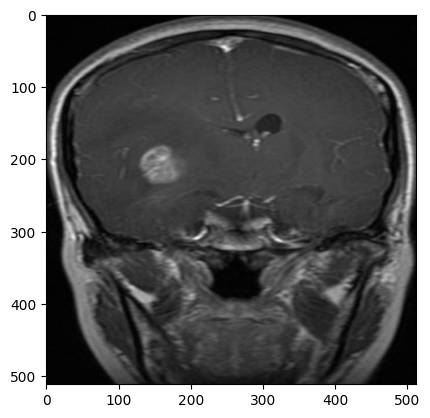

In [ ]:
import matplotlib.pyplot as plt

# Function for loading images and assigning labels
def load_images(data_dir, categories):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        label = categories.index(category)  # Encode label as an integer based on index
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #Preprocessing made for grayscale
            if image is not None:
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images(DATA_DIR, CATEGORIES)
plt.imshow(images[0], cmap='gray')


# Confirm loading was successful
# print("Loaded images:", len(images))
# print("Loaded labels:", len(labels))

Total images loaded: 3264
Total labels loaded: 3264

Image counts per category:
glioma_tumor: 926 images
no_tumor: 500 images
meningioma_tumor: 937 images
pituitary_tumor: 901 images


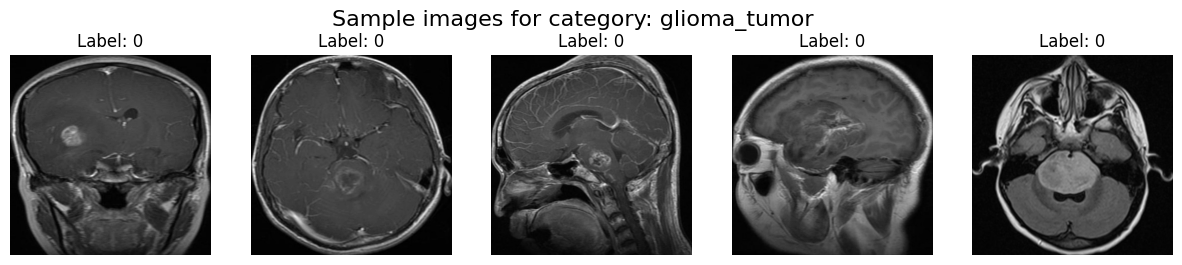

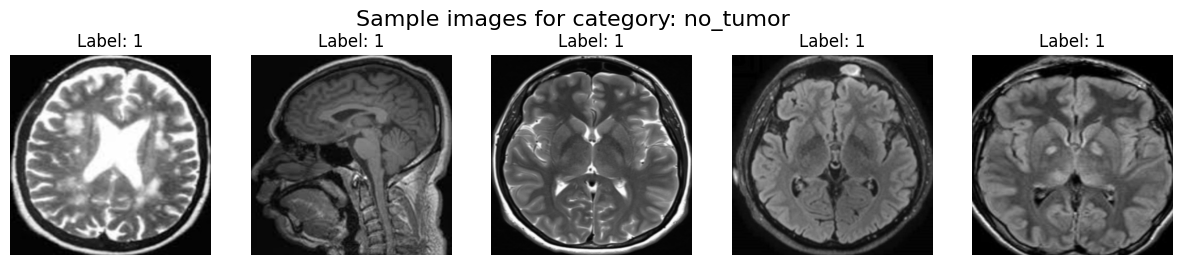

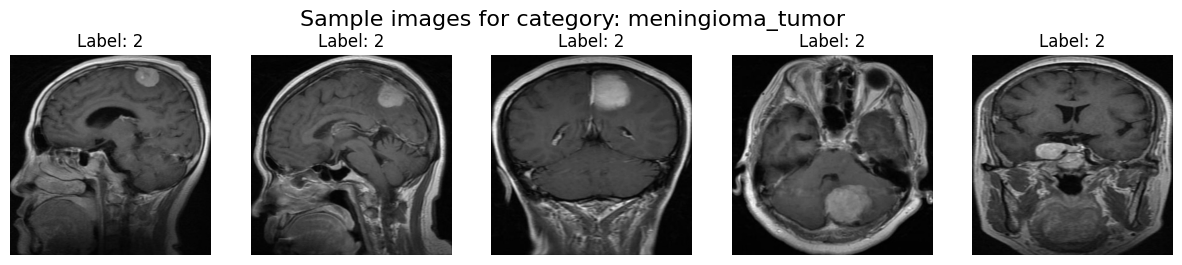

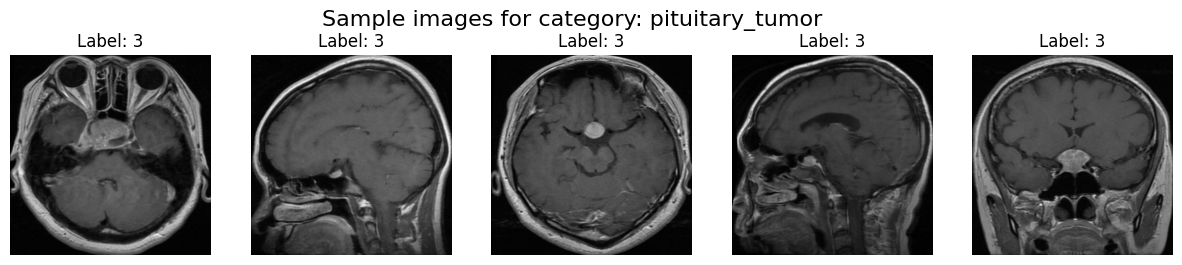

In [ ]:
from collections import Counter

# Load images and labels
images, labels = load_images(DATA_DIR, CATEGORIES)

# Confirm loading was successful
print("Total images loaded:", len(images))
print("Total labels loaded:", len(labels))

# Check distribution of labels to confirm they match categories
label_counts = Counter(labels)
print("\nImage counts per category:")
for category, label in zip(CATEGORIES, range(len(CATEGORIES))):
    print(f"{category}: {label_counts[label]} images")

import matplotlib.pyplot as plt

# Function to display a few sample images from each category
def display_sample_images(images, labels, categories, num_samples=5):
    # Loop over each category
    for category_idx, category_name in enumerate(categories):
        # Find indexes of images with current label
        category_images = [img for img, label in zip(images, labels) if label == category_idx]

        # Display only the specified number of samples (e.g., 5)
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Sample images for category: {category_name}", fontsize=16)
        for i in range(min(num_samples, len(category_images))):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(category_images[i], cmap='gray')
            plt.title(f"Label: {category_idx}")
            plt.axis('off')
        plt.show()

# Call the function to display images and labels for each category
display_sample_images(images, labels, CATEGORIES)


# Data en conjuntos de Training Testing Validation

The first line of code split the overall data into 60% Training isolating 40% for testing with the specific seed to guaratee reproducibility.
Consequently, the 40% for testing is subdivided in half i.e. 20% each, for validation and testing respectively.
Finally the

citar libreria.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Load images and labels
images, labels = load_images(DATA_DIR, CATEGORIES)
# One-hot encode labels (apply after loading)
categorical_labels = to_categorical(labels, num_classes=4)  # Assuming 4 classes
# One-hot encode labels (apply after loading)

# Split data into training, validation, and test sets (e.g., 60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(images, categorical_labels, test_size=0.4, random_state=SEED, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)

# Display the split sizes
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (1958, 512, 512)
Validation set size: (653, 512, 512)
Test set size: (653, 512, 512)


# Red Neuronal Convolucional

Khaliki, M.Z., Başarslan, M.S. Brain tumor detection from images and comparison with transfer learning methods and 3-layer CNN. Sci Rep 14, 2664 (2024). https://doi-org.pucv.idm.oclc.org/10.1038/s41598-024-52823-9


Introducir cita para fundamentar arquitectura de la red.

"First, we need to determine the architecture of our model. The input form of our data is 400 × 400 and has 3 channels. Since we have a total of 4 different classes, the number of output classes is set to 4. Our model has a structure that includes convolutional and pooling layers. First, there is a 3 × 3 convolutional layer with 32 filters. This is followed by a 2 × 2 max pooling layer. This reduces the size by emphasizing lower-level features. To deepen our model, this structure is repeated twice, adding convolutional layers with 64 and 128 filters, respectively, and maximum pooling layers of size 2 × 2."


## Imported libraries:

### CNN Architecture
* Conv2D: Convolutional layer for feature detection. (Number of layers, (kernel size), activation function, input specs)
* MaxPooling2D: Pooling layer to reduce dimensionality. (Pool size 2 x 2)
* Flatten: Flattens 2D output to 1D for dense layers (Converts matrix into a vector for final classification on fully conected layers)
* Dense: Fully connected layer for classification (Final 128 neuron layer of learning and final 4 neuron classifier)
* Dropout: Regularization layer to prevent overfitting. (Probabilistic approach to deactivate some inputs in order to reduce specific neuron dependency)

### CNN Solver
* Rectified Adam: Adaptive learning rate optimization algorithm with rectification. (Allows higher learning rates at the beggining and is adaptively reduces as model converges).
    * Parameters: learning rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999 (beta's exponential decay in learning), epsilon = 1e-8 (prevents divided by zero)
* ReduceLR0nPlateau: Callback to reduce learning rate when **validation loss** doesn't improve in epochs based on set patience
    * Reduces learning rate by a factor of 0.3 after 3 epochs without improvement, with a minimum learning rate of 1e-6





# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.optimizers import RectifiedAdam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model Architecture based on the paper's CNN settings
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.05),  # Dropout with 5% as per the paper

    # Output Layer
    Dense(4, activation='softmax') # Class with the highest probability gets chosen
])

# Compile the model with Rectified Adam and categorical cross-entropy
optimizer = RectifiedAdam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Display the model summary to confirm the architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 126, 126, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 62, 62, 128)       0

# Run the CNN

In [ ]:
# Set up ReduceLROnPlateau as a callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# Training configuration
# Callbacks and model fitting
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=14,
                    batch_size=10,
                    callbacks=[reduce_lr])

Epoch 1/14
196/196 [==============================] - 26s 125ms/step - loss: 0.6851 - accuracy: 0.6481 - precision: 0.8231 - recall: 0.5419 - val_loss: 0.9361 - val_accuracy: 0.6554 - val_precision: 0.7799 - val_recall: 0.5590 - lr: 3.0000e-05
Epoch 2/14
196/196 [==============================] - 22s 112ms/step - loss: 0.6635 - accuracy: 0.6241 - precision: 0.7967 - recall: 0.5383 - val_loss: 0.8722 - val_accuracy: 0.6371 - val_precision: 0.7459 - val_recall: 0.5620 - lr: 3.0000e-05
Epoch 3/14
196/196 [==============================] - 22s 112ms/step - loss: 0.6233 - accuracy: 0.6318 - precision: 0.7891 - recall: 0.5638 - val_loss: 0.7823 - val_accuracy: 0.6294 - val_precision: 0.7500 - val_recall: 0.5559 - lr: 3.0000e-05
Epoch 4/14
196/196 [==============================] - 22s 112ms/step - loss: 0.5779 - accuracy: 0.6573 - precision: 0.7982 - recall: 0.5858 - val_loss: 0.8323 - val_accuracy: 0.6080 - val_precision: 0.6861 - val_recall: 0.5758 - lr: 3.0000e-05
Epoch 5/14
196/196 [====

# Performance Metrics

21/21 [==============================] - 1s 60ms/step
Accuracy: 0.7932618683001531
Precision: 0.79802092323001
Recall: 0.7932618683001531
F1 Score: 0.7896748097549598


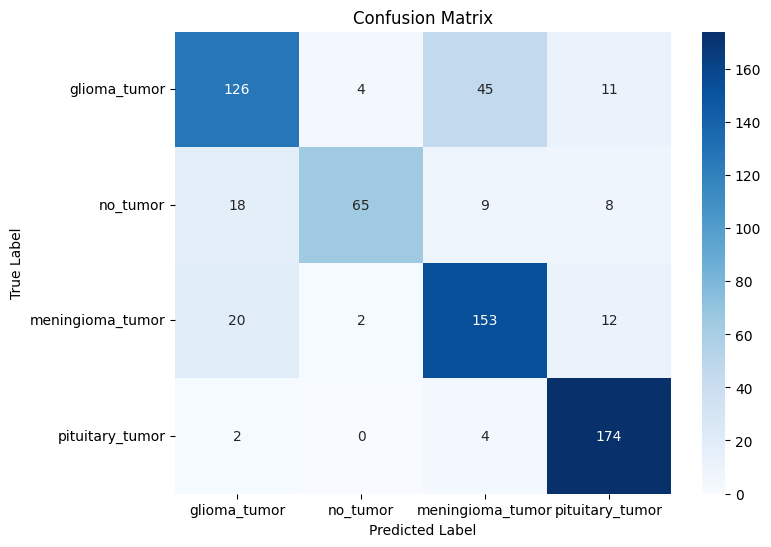

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)  # Convert probabilities to class labels

y_pred_labels = to_categorical(y_pred_labels, num_classes=4)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_labels, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC - AUC

* ROC: Receiver Operating Characteristic Curve

    Plots the True Positive Rate (TPR or sensitivity) against the False Positive Rate (FPR).
    Ideally, the curve will follow the top-left corner, indicating high TPR and low FPR.

* AUC: Area Under the Curve

    From 0 to 1 indicates the area under the ROC to measure its performance
    * 1.0: Perfect classifier.
    * 0.5: Random guessing (baseline).
    * <0.5: Worse than random (indicates inverse relationship)

21/21 [==============================] - 1s 54ms/step


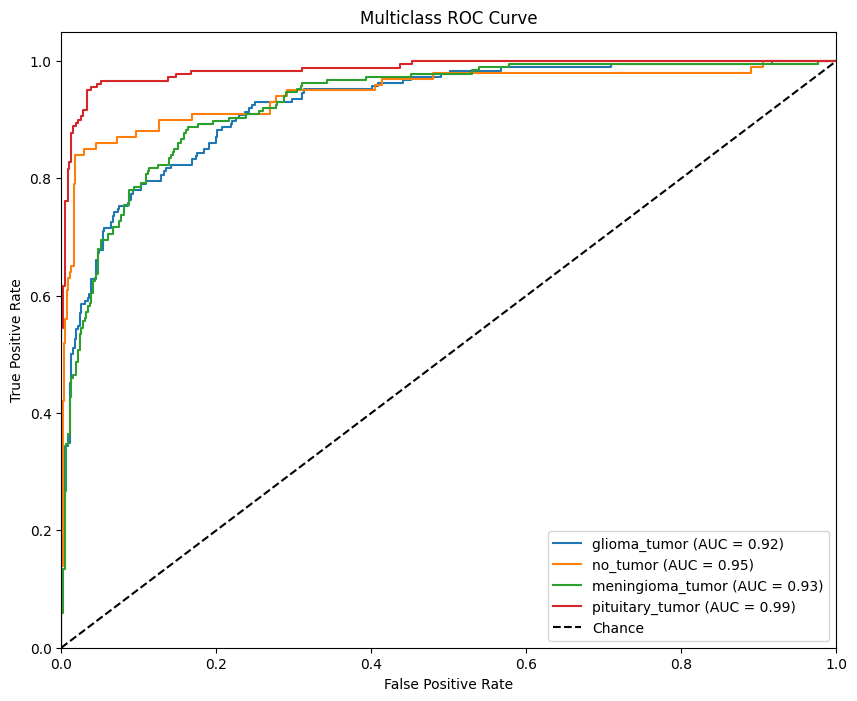

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Binarize the labels for the test set (y_test) to make them suitable for multiclass ROC calculation
n_classes = len(CATEGORIES)  # Number of classes (4 in your case)
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))  # Convert integer labels to binary (one-hot) format

# Step 2: Get predicted probabilities from the model
y_pred = model.predict(X_test)  # Predicted probabilities for each class

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Calculate the ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{CATEGORIES[i]} (AUC = {roc_auc:.2f})")  # Use category names for each curve

# Plot the "chance" line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Chance')  # Diagonal line for random guessing

# Step 4: Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()



# Has to be iteratively ran for multiple seeds to ensure consistency and also for gaussian filter applied

# Transfer learning:
* EfficientNetB4 will be used adding custom layers GlobalAveragePooling2D (instead of Flatten to prevent overfitting), Dropout and Dense.
* Same training parameters will be applied (optimizer, learning rate, batch size, epochs) for comparison.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Conv2D, Input
from tensorflow_addons.optimizers import RectifiedAdam

# Load VGG16 base model with pre-trained ImageNet weights, excluding the top classification layer
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
vgg16_base.trainable = False  # Freeze the base model to avoid training its weights

# Input Layer to handle 1-channel (grayscale) images and convert to 3-channel RGB
input_layer = Input(shape=(512, 512, 1))  # Input shape as (512, 512, 1)
conv_layer = Conv2D(3, (3, 3), padding='same')(input_layer)  # Convert grayscale to RGB (3 channels)

# Build the custom model architecture
vgg16_model = Sequential([
    Model(inputs=input_layer, outputs=conv_layer),  # Grayscale to RGB conversion
    vgg16_base,  # Add the pre-trained VGG16 base
    GlobalAveragePooling2D(),  # Global average pooling to reduce overfitting
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.05),  # Dropout for regularization (as specified)
    Dense(4, activation='softmax')  # Output layer for 4 classes
])

# Configure Rectified Adam (RAdam) optimizer with the exact parameters from the paper
optimizer = RectifiedAdam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# Compile the model with categorical crossentropy loss and the desired metrics
vgg16_model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Display the model summary to confirm the architecture
vgg16_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1 (Functional)        (None, 512, 512, 3)       30        
                                                                 
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                      

# Run the VGG16 model

In [ ]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Set up ReduceLROnPlateau as a callback to adjust learning rate during training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# Directly use the X_train, X_val, and X_test from custom CNN
def train_model():
    history = vgg16_model.fit(
        X_train, y_train,  # Training data (grayscale images and labels)
        validation_data=(X_val, y_val),  # Validation data
        epochs=14,  # Number of epochs
        batch_size=32,
        callbacks=[reduce_lr]  # Include learning rate adjustment callback
    )
    return history

# Train the VGG16 model
history = train_model()



Epoch 1/14
62/62 [==============================] - 180s 2s/step - loss: 2.3814 - accuracy: 0.2712 - precision: 0.2717 - recall: 0.2237 - val_loss: 1.8282 - val_accuracy: 0.2910 - val_precision: 0.3202 - val_recall: 0.1868 - lr: 1.0000e-04
Epoch 2/14
62/62 [==============================] - 113s 2s/step - loss: 1.7499 - accuracy: 0.3013 - precision: 0.3187 - recall: 0.1742 - val_loss: 1.5479 - val_accuracy: 0.3507 - val_precision: 0.4211 - val_recall: 0.1838 - lr: 1.0000e-04
Epoch 3/14
62/62 [==============================] - 113s 2s/step - loss: 1.5450 - accuracy: 0.3616 - precision: 0.3962 - recall: 0.2007 - val_loss: 1.3662 - val_accuracy: 0.4487 - val_precision: 0.5597 - val_recall: 0.2297 - lr: 1.0000e-04
Epoch 4/14
62/62 [==============================] - 113s 2s/step - loss: 1.3477 - accuracy: 0.4464 - precision: 0.5140 - recall: 0.2625 - val_loss: 1.1821 - val_accuracy: 0.5391 - val_precision: 0.6462 - val_recall: 0.3216 - lr: 1.0000e-04
Epoch 5/14
62/62 [======================

#  Performance Metrics Transfer Learning

21/21 [==============================] - 13s 654ms/step
Accuracy: 0.7611026033690659
Precision: 0.7950449130380269
Recall: 0.7611026033690659
F1 Score: 0.7647861316558703


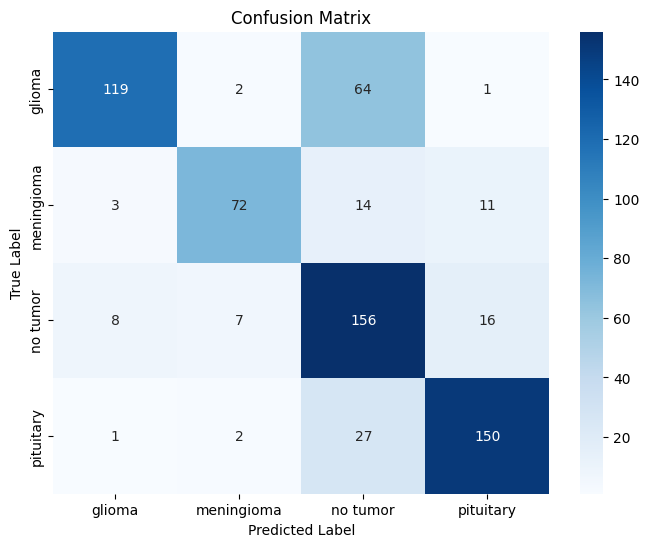

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set using the VGG16 model
y_pred = vgg16_model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded y_test to label encoded form if necessary
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot to class labels if y_test is one-hot encoded

# Calculate performance metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Ensure CATEGORIES is defined with your class names
CATEGORIES = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Plot the confusion matrix with category names
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=CATEGORIES, yticklabels=CATEGORIES)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC - AUC Transfer Learning

21/21 [==============================] - 13s 643ms/step


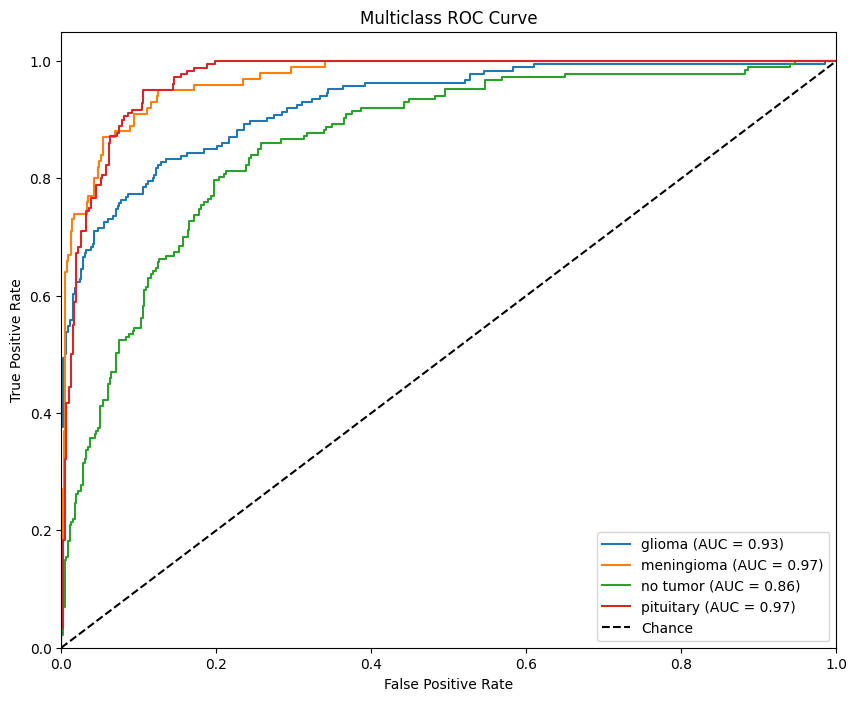

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Step 1: Binarize the labels for the test set (y_test) to make them suitable for multiclass ROC calculation
n_classes = len(CATEGORIES)  # Number of classes (4 in your case)
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))  # Convert integer labels to binary (one-hot) format

# Step 2: Get predicted probabilities from VGG16 model
y_pred = vgg16_model.predict(X_test)  # Predicted probabilities for each class

# Step 3: Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    # Calculate the ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{CATEGORIES[i]} (AUC = {roc_auc:.2f})")  # Use category names for each curve

# Plot the "chance" line for reference
plt.plot([0, 1], [0, 1], 'k--', label='Chance')  # Diagonal line for random guessing

# Step 4: Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()
